In [1]:
from datascience import *
from datascience.predicates import are
path_data = '../../../../data/'
import numpy as np
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen
import re
def read_url(url):
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

# Plotting the classics

In this example, we will explore statistics for two classic novels: *The Adventures of Huckleberry Finn* by Mark Twain, and *Little Women* by Louisa May Alcott. The text of any book can be read by a computer at great speed. Books published before 1923 are currently in the *public domain*, meaning that everyone has the right to copy or use the text in any way. [Project Gutenberg](http://www.gutenberg.org/) is a website that publishes public domain books online. Using Python, we can load the text of these books directly from the web.

This example is meant to illustrate some of the broad themes of this text. Don't worry if the details of the program don't yet make sense. Instead, focus on interpreting the images generated below. Later sections of the text will describe most of the features of the Python programming language used below.

First, we read the text of both books into lists of chapters, called `huck_finn_chapters` and `little_women_chapters`. In Python, a name cannot contain any spaces, and so we will often use an underscore `_` to stand in for a space. The `=` in the lines below give a name on the left to the result of some computation described on the right. A *uniform resource locator* or *URL* is an address on the Internet for some content; in this case, the text of a book. The `#` symbol starts a comment, which is ignored by the computer but helpful for people reading the code.

In [40]:
# Read two books, fast!

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

While a computer cannot understand the text of a book, it can provide us with some insight into the structure of the text. The name `huck_finn_chapters` is currently bound to a list of all the chapters in the book. We can place them into a table to see how each chapter begins.

In [39]:
# Display the chapters of Huckleberry Finn in a table.

Table().with_column('Chapters', Secret_remedies_chapters)

NameError: name 'Secret_remedies_chapters' is not defined

Each chapter begins with a chapter number in Roman numerals, followed by the first sentence of the chapter. Project Gutenberg has printed the first word of each chapter in upper case.

In [51]:


Secret_remedies_url = 'https://www.gutenberg.org/cache/epub/75168/pg75168.txt'
Secret_remedies_text = read_url(Secret_remedies_url)
Secret_remedies_chapters = Secret_remedies_text.split('CHAPTER')[1:]

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [42]:


Table().with_column('CHAPTER I', Secret_remedies_chapters)

CHAPTER I
PAGE I.—Catarrh and Cold Cures 1 II.—Cough Medicines 9 ...
I. CATARRH AND COLD CURES. The analyses here given of s ...
"II. COUGH MEDICINES There are probably few, if any, ail ..."
III. CONSUMPTION CURES. Nostrums and quack medicines va ...
IV. HEADACHE POWDERS. Headache is so common a disorder ...
"V. BLOOD PURIFIERS. Although, as a rule, the makers of ..."
"VI. REMEDIES FOR GOUT, RHEUMATISM, AND NEURALGIA. The m ..."
VII. KIDNEY MEDICINES. This group of nostrums consists ...
"VIII. DIABETES. Diabetes, being a disease which runs on ..."
IX. OBESITY CURES. The claims made for nostrums adverti ...


Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

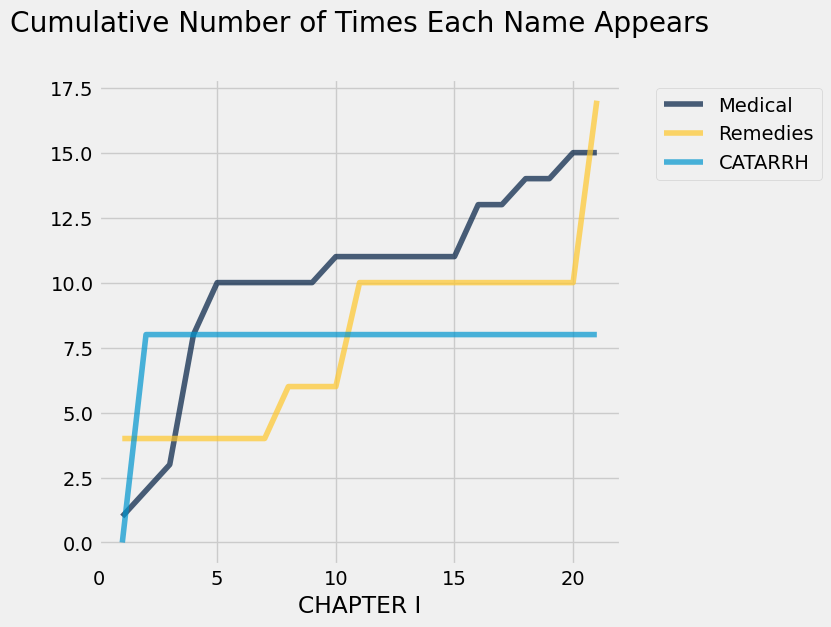

In [43]:
# Get the cumulative counts the names Jim, Tom, and Huck appear in each chapter.

counts = Table().with_columns([
        'Medical', np.cumsum(np.char.count(Secret_remedies_chapters, 'Medical')),
        'Remedies', np.cumsum(np.char.count(Secret_remedies_chapters, 'Remedies')),
        'CATARRH', np.cumsum(np.char.count(Secret_remedies_chapters, 'CATARRH'))
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.with_column('CHAPTER I', np.arange(1, 22, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

In [53]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_Secret_remedies = Table().with_columns([
        'Secret remedies Chapter Length', [len(s) for s in Secret_remedies_chapters],
        'Number of Periods', np.char.count(Secret_remedies_chapters, '.')
    ])
chars_periods_huck_finn = Table().with_columns([
        'Huck Finn Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_little_women = Table().with_columns([
        'Little Women Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

In [48]:
chars_periods_Secret_remedies

Secret remedies Chapter Length,Number of Periods
6624,54
16082,170
23358,243
38413,383
8654,85
16581,149
34777,395
21383,192
14166,119
48975,479


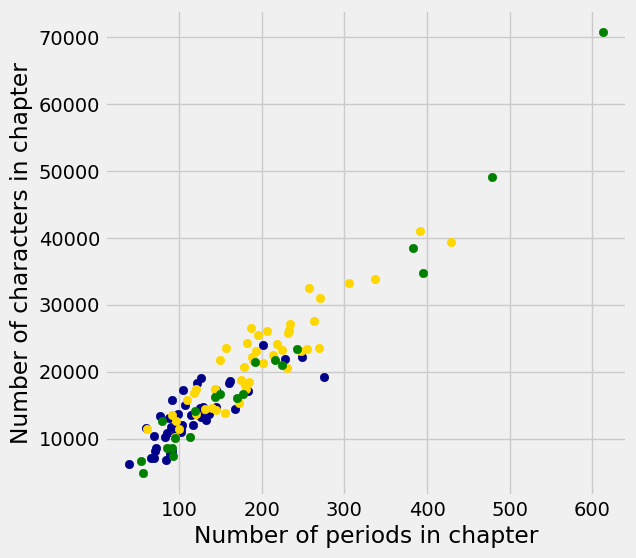

In [54]:
plots.figure(figsize=(6, 6))
plots.scatter(chars_periods_huck_finn.column(1),
              chars_periods_huck_finn.column(0),
              color='darkblue')
plots.scatter(chars_periods_little_women.column(1),
              chars_periods_little_women.column(0),
              color='gold')
plots.scatter(chars_periods_Secret_remedies.column(1),
              chars_periods_Secret_remedies.column(0),
              color='green')

plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');

The plot of the book appears to center around medical remedies, particularly those aimed at treating specific ailments such as catarrh and other health conditions. The use of the word "catarrh" suggests that the book may delve into outdated or historical medical practices, highlighting the remedies that were once believed to cure various illnesses. By focusing on these medical themes, the book likely explores society's understanding of health and wellness during the time it was written, offering insight into the cultural and scientific beliefs of that era. The prominence of "remedies" may also reflect humanity's enduring quest for healing and the challenges of medical knowledge in historical contexts.

The scatter plot reveals distinct patterns in chapter structure across the three books. Huckleberry Finn features shorter, more concise chapters, aligning with its episodic, conversational storytelling style. In contrast, Little Women has significantly longer and more varied chapters, reflecting its detailed narrative and exploration of complex relationships. Secret Remedies falls in between, with moderately sized, structured chapters, likely due to its informational and instructional focus on medical topics. These differences highlight how chapter lengths and sentence counts reflect each book's purpose, style, and intended audience.